## Class 005
*Working with data*: datascience Table

## Learning Goals for Lab 03
### Loading Data Sets and Exploratory Data Analysis
*neccessary*: 
`from datascience import *`
- Table is a new Variable & Data Types
    - Strings
    - Integer
    - float
    - list [ ]
    - numpy.array
    - datascience.tables.Table
- arrays: from datascience import *
    - `make_array(0.125, 4.75, -1.3)` 
- arrays: import numpy as np
    - `np.array([0, 1, -1, math.pi, math.e])`
    - `np.arange(1,13)` 
- lists: [1, 2, 3, 4]
#### Table
- `T=Table().with_columns('Month',np.arange(1,13))`
- `Table.read_table(data)`


#### Initialize with imported new functionality for plotting data.

In [1]:
# import for plotting
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

### First data table

In [2]:
from datascience import *
import numpy as np

# Creates a table with one column
T=Table().with_columns('Month',np.arange(1,13))
T

Month
1
2
3
4
5
6
7
8
9
10


In [3]:
# Adds a another column to the existing table
T = T.with_columns('Average_SnowFall (inch)',make_array(5.6,5.6,2.4,0.1,0,0,0,0,0,0,0.1,3.2))

In [4]:
T.show()

Month,Average_SnowFall (inch)
1,5.6
2,5.6
3,2.4
4,0.1
5,0
6,0
7,0
8,0
9,0
10,0


## Back to our first table

In [5]:
# Make a list of months
m = [
 'January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']
m

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

In [6]:
# Replace the column with month names instead of numbers
T = T.with_columns('Month', m)
T.show()

Month,Average_SnowFall (inch)
January,5.6
February,5.6
March,2.4
April,0.1
May,0
June,0
July,0
August,0
September,0
October,0


### Sorting a table

In [7]:
# Sort months by snowfall amounts
# Notice the use of the keyword argument to change the sort order
T.sort('Average_SnowFall (inch)', descending=True)

Month,Average_SnowFall (inch)
January,5.6
February,5.6
December,3.2
March,2.4
April,0.1
November,0.1
May,0
June,0
July,0
August,0


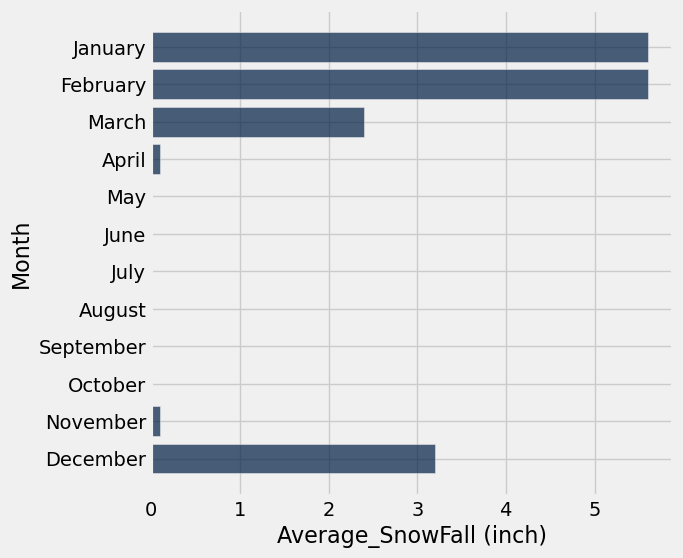

In [10]:
# Create a horizontal bar chart:  table.barh(Category, values)
T.barh('Month', 'Average_SnowFall (inch)')

### Census data example
#### For your own exploration

In [11]:
data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'
# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,0,3944153,3944160,3951495,3963264,3926731,3931411,3954973,3984144,3963268,3882437,3826908,3762227,3735010
0,1,3978070,3978090,3957904,3966768,3978210,3943348,3949559,3973828,4003586,3981864,3897917,3842257,3773884
0,2,4096929,4096939,4090799,3971498,3980139,3993047,3960015,3967672,3992657,4021261,3996742,3911822,3853025
0,3,4119040,4119051,4111869,4102429,3983007,3992839,4007852,3976277,3984985,4009060,4035053,4009037,3921526
0,4,4063170,4063186,4077511,4122252,4112849,3994539,4006407,4022785,3992241,4000394,4021907,4045996,4017847
0,5,4056858,4056872,4064653,4087770,4132349,4123745,4007123,4020489,4038022,4007233,4012789,4032231,4054336
0,6,4066381,4066412,4073031,4075153,4097860,4142923,4135738,4020428,4034969,4052428,4019106,4022432,4040169
0,7,4030579,4030594,4043100,4083399,4085255,4108453,4154947,4148711,4034355,4048430,4063647,4027876,4029753
0,8,4046486,4046497,4025624,4053313,4093553,4096033,4120476,4167765,4162142,4047130,4059209,4071894,4034785
0,9,4148353,4148369,4125413,4035854,4063662,4104437,4107986,4133426,4181069,4175085,4058207,4067320,4078668


### Making a new table with a subset of the columns

Important to remember: Use select to create a new table with just some of the columns from the original table; use column to extract the data from a column.

In [12]:
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table

SEX,AGE,POPESTIMATE2010,POPESTIMATE2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


### Extract the data from a particular table column as an array

In [13]:
# Extracts the data from a column as an array
partial_census_table.column("AGE")

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 999,   0,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  7

### You can perform math operation on an entire array at once.
This is called "broadcasting" the operation to all of the array elements.

In [14]:
3 * partial_census_table.column("AGE")

array([   0,    3,    6,    9,   12,   15,   18,   21,   24,   27,   30,
         33,   36,   39,   42,   45,   48,   51,   54,   57,   60,   63,
         66,   69,   72,   75,   78,   81,   84,   87,   90,   93,   96,
         99,  102,  105,  108,  111,  114,  117,  120,  123,  126,  129,
        132,  135,  138,  141,  144,  147,  150,  153,  156,  159,  162,
        165,  168,  171,  174,  177,  180,  183,  186,  189,  192,  195,
        198,  201,  204,  207,  210,  213,  216,  219,  222,  225,  228,
        231,  234,  237,  240,  243,  246,  249,  252,  255,  258,  261,
        264,  267,  270,  273,  276,  279,  282,  285,  288,  291,  294,
        297,  300, 2997,    0,    3,    6,    9,   12,   15,   18,   21,
         24,   27,   30,   33,   36,   39,   42,   45,   48,   51,   54,
         57,   60,   63,   66,   69,   72,   75,   78,   81,   84,   87,
         90,   93,   96,   99,  102,  105,  108,  111,  114,  117,  120,
        123,  126,  129,  132,  135,  138,  141,  1

### Chaining methods: applying each method successively on the result of the previous method.
The innermost operation is applied first.

In [15]:
# "relabeled" is used to rename columns
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020').relabeled('SEX','GENDER')
us_pop

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


### Using .where() method
[see:http://data8.org/datascience/reference-nb/datascience-reference.html#tbl.where() ]
This selects rows from a table that satisfy some condition.

**This is important as we will using it a lot!**

In [16]:
us_pop.where('GENDER', 0)

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [17]:
# This is the same operation because are.equal_to is the default filter
us_pop.where('GENDER', are.equal_to(0))

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [18]:
# Chaining where() filters
popdata = us_pop.where('GENDER',0).where('AGE',are.below(99))
popdata

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [19]:
# You don't have to chain. You can do this in steps
# Working in steps is often easier to debug, even if it is more verbose
popdata = us_pop.where('GENDER', 0)
popdata = popdata.where('AGE', are.below(99))
popdata

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


### Tables have built-in plotting methods
This plot shows how the age distribution in the US changed between 2010 and 2020.

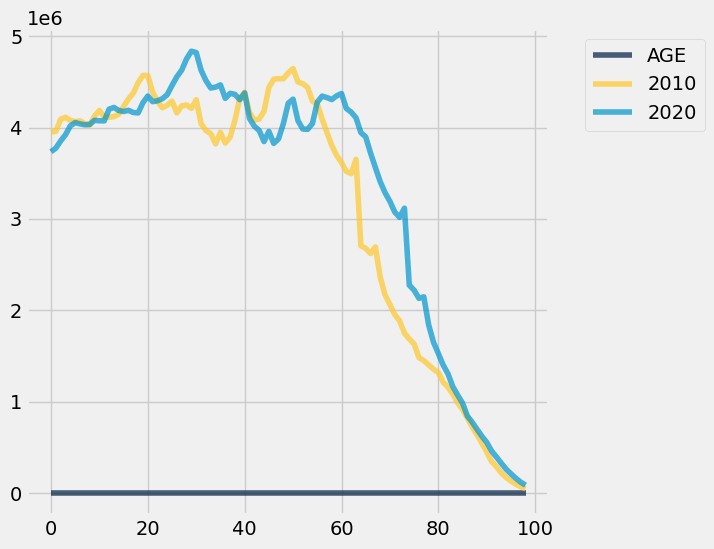

In [20]:
popdata.select('AGE', '2010', '2020').plot()

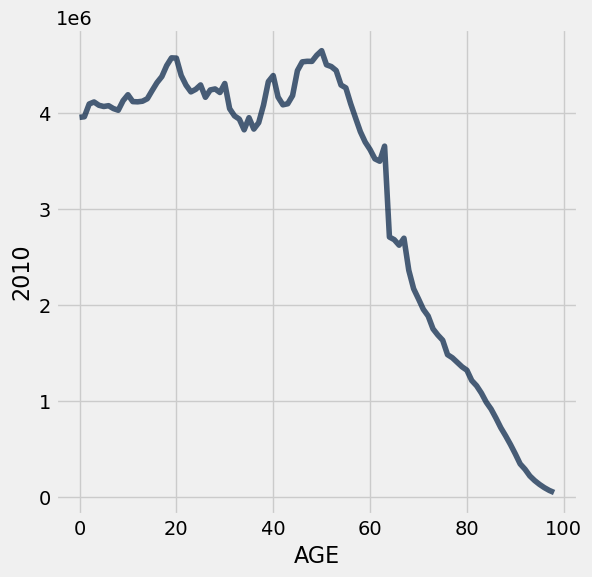

In [21]:
popdata.select('AGE', '2010', '2020').plot('AGE', '2010')

### Importing the Minard Data

In [23]:
minard = Table.read_table("data/minard.csv")
minard

Longitude,Latitude,City,Direction,Survivors
32,54.8,Smolensk,Advance,145000
33.2,54.9,Dorogobouge,Advance,140000
34.4,55.5,Chjat,Advance,127100
37.6,55.8,Moscou,Advance,100000
34.3,55.2,Wixma,Retreat,55000
32,54.6,Smolensk,Retreat,24000
30.4,54.4,Orscha,Retreat,20000
26.8,54.3,Moiodexno,Retreat,12000


### Importing the Actor Data

In [24]:
actors = Table.read_table("data/actors.csv")
actors

Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
Tom Hanks,4340.8,44,98.7,Toy Story 3,415
"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4
Eddie Murphy,3810.4,38,100.3,Shrek 2,441.2
Tom Cruise,3587.2,36,99.6,War of the Worlds,234.3
Johnny Depp,3368.6,45,74.9,Dead Man's Chest,423.3
Michael Caine,3351.5,58,57.8,The Dark Knight,534.9
Scarlett Johansson,3341.2,37,90.3,The Avengers,623.4
